<a href="https://colab.research.google.com/github/AnupKrSingh/FB-Page-Decorder/blob/main/Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-1 : Which User is interacting with the page the highest? (Interactions = Likes + Shares + Comments)

In [ ]:
#loading the pandas library

import pandas as pd

#loading the excel sheets into notebook

excel_sheets =pd.ExcelFile('/content/Question Set - FB_Page_Decoder.xlsx')



#checking the names of sheets present

excel_sheets.sheet_names

#creating separate dataframes for the sheets

df_post=excel_sheets.parse('Post_List')
df_comment=excel_sheets.parse('Comments')
df_react=excel_sheets.parse('Reactions')
df_share=excel_sheets.parse('Shares')


In [ ]:
#checking if data frames are ok

df_post.head()

,post_date,Post_Text,Post_Embedded_URL,Post_URL
0,2020-07-22,"Dear Shankra Family, \n first of all, we want ...",http://bit.ly/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=30...
1,2020-10-30,Walking towards the future with the strongest ...,b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
2,2020-10-27,"The Mesolcina Mountain Chain, home to Shankra ...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
3,2020-10-24,"We believe in pure music, freely expressed by ...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
4,2020-10-21,"The beating heart of our Valley, Shankra Stage...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...


In [ ]:
df_comment.head()

,Name,People_URL,Page_Or_Person,Post_URL,Comment
0,Andreas Kenotaph,https://m.facebook.com/andreas.inkmann,Person,https://m.facebook.com/story.php?story_fbid=30...,Felt good to give you something back for all t...
1,Top fan\nLuca Maccarone,https://m.facebook.com/luca.maccarone.7,Person,https://m.facebook.com/story.php?story_fbid=30...,I already canâ€™t wait for next year ðŸ˜ It w...
2,Lia Silva,https://m.facebook.com/alma.lilly.aho,Person,https://m.facebook.com/story.php?story_fbid=30...,Is the line up remaining the same?ðŸ¦‹
3,Author\nShankra Festival,https://m.facebook.com/shankrafestival/,Page,https://m.facebook.com/story.php?story_fbid=30...,yes :)
4,Author\nShankra Festival,https://m.facebook.com/shankrafestival/,Page,https://m.facebook.com/story.php?story_fbid=30...,"Yes, tickets for the 2020's edition will grant..."


In [ ]:
df_react.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL
0,Aremacs Sud-Est,https://m.facebook.com/AremacsSudEst/,Like,Page,https://m.facebook.com/story.php?story_fbid=30...
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagaz...,Love,Page,https://m.facebook.com/story.php?story_fbid=30...
2,Vale DeKÃ¬,https://m.facebook.com/vale.deki.5,Like,Person,https://m.facebook.com/story.php?story_fbid=30...
3,AndrÃ© Novais,https://m.facebook.com/andre.novais.7777,Like,Person,https://m.facebook.com/story.php?story_fbid=30...
4,Luca Luca,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=30...


In [ ]:
df_share.head()

,Shares_By,Shares_By_URL,Page_Or_Person,Total_Share,Post_URL
0,Eric Keriguy,https://m.facebook.com/eric.keriguy.7,Person,56 shares,https://m.facebook.com/story.php?story_fbid=30...
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagaz...,Page,56 shares,https://m.facebook.com/story.php?story_fbid=30...
2,Dj Kalanio,https://m.facebook.com/kalanio44/,Page,56 shares,https://m.facebook.com/story.php?story_fbid=30...
3,Silvia Sey,https://m.facebook.com/silvia.mandelli.73,Person,56 shares,https://m.facebook.com/story.php?story_fbid=30...
4,Giovanni Ricciardi,https://m.facebook.com/giovanniricciardijunior,Person,56 shares,https://m.facebook.com/story.php?story_fbid=30...


In [ ]:
#extracting the required data from these dataframes and putting that data in data frame

c1=pd.DataFrame(df_share.Shares_By.value_counts())
c1.head(20)

,Shares_By
Il Kahuixx,3
Ilinka Radojicic,2
Anastasia Mangeolle,2
Yan Migaud,2
synthetik chaos,2
Juan Manuel,2
Roman Kornas,2
Michele Fontanarosa,1
Anne Shanna Hora,1
Riccardo Boncompagni,1


In [ ]:
#repeating the same with other dataframes 

c2=pd.DataFrame(df_react.Reactions_By.value_counts())
c3=pd.DataFrame(df_comment.Name.value_counts())

#merging the dataframes to single df for result

final=pd.concat([c1,c2,c3],axis=1, join= 'outer')
final['total_interactions']=final.sum(axis=1)
final

,Shares_By,Reactions_By,Name,total_interactions
Il Kahuixx,3.0,4.0,2.0,9.0
Ilinka Radojicic,2.0,1.0,NaN,3.0
Anastasia Mangeolle,2.0,1.0,NaN,3.0
Yan Migaud,2.0,NaN,NaN,2.0
synthetik chaos,2.0,NaN,NaN,2.0
...,...,...,...,...
SÃ£o Braz Santiago,NaN,NaN,1.0,1.0
Aviad Nissim,NaN,NaN,1.0,1.0
Peter Pettersson,NaN,NaN,1.0,1.0
Rebecca de Jong,NaN,NaN,1.0,1.0


In [ ]:
#getting the loactaion of the person with maximum interactions and printing his/her name

final.total_interactions.idxmax()


'Benjamin Rutschmann'

# Q-2 : In Post_List, you have a column called Post_Text - Identify the Keywords on which interactions are the highest. (Interactions = Likes + Shares + Comments)

In [ ]:
#repeating the process above to know which post has maximum interaction


u2=pd.DataFrame(df_comment.Post_URL.value_counts()).rename(columns={'Post_URL':'Comment_count'})
u3=pd.DataFrame(df_react.Post_URL.value_counts()).rename(columns={'Post_URL':'Reaction_count'})
u4=pd.DataFrame(df_share.Post_URL.value_counts()).rename(columns={'Post_URL':'Share_count'})
uf=pd.concat([u2,u3,u4], axis=1, join= 'outer')
uf['Total_reactions']=uf.sum(axis=1)

uf.head()


,Comment_count,Reaction_count,Share_count,Total_reactions
https://m.facebook.com/story.php?story_fbid=2440962296025518&id=632170870238012&__tn__=-R,93.0,95,28.0,216.0
https://m.facebook.com/story.php?story_fbid=2450929748362106&id=632170870238012&__tn__=-R,89.0,94,30.0,213.0
https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,86.0,91,29.0,206.0
https://m.facebook.com/story.php?story_fbid=2824549447666799&id=632170870238012&__tn__=-R,66.0,92,21.0,179.0
https://m.facebook.com/story.php?story_fbid=2503349356453478&id=632170870238012&__tn__=-R,64.0,91,25.0,180.0


In [ ]:
#to know the url of post with max interactions

kw=uf.Total_reactions.idxmax()
kw

#from post_list trying to get to know which post does url corresponds

df_post.Post_Text.loc[data1['Post_URL']==kw]


26    Dear Shankra Family, \n we are delighted to an...
Name: Post_Text, dtype: object

In [ ]:
#loading required libraries
!pip install nltk
!pip install stop_words

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk import tokenize
from operator import itemgetter
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

In [ ]:
post="Dear Shankra Family, as we are facing an out of ordinary situation due to the pandemic of COVID-19 which affects our daily life, we felt that sharing our thoughts on the future was much needed. To reassure you, we are not planning or considering to cancel Shankra 2020. This uncertain moment has an impact on the way our society functions and Shankra Festival is no exception to that. Still, we have an unshakable hope that four months from now till our festival gate opens, the grand scale of things will be much different from now. With that faith and hope we still continue the production of the festival as planned. As event organizers we will implement and execute with responsibility all rules, regulations and recommendations issued by the Swiss Government. It always starts with a simple actionâ€¦ now more than ever that prevails to be the truth. Individual responsibility can have an immeasurable impact in the environment surrounding us, particularly in this delicate moment that concerns the health of your beloved family and community. We request you to be constantly informed and execute as a duty the health and safety measures issued by your local government and authorities, as they may vary from country to country. For all the ticket holders, we are working on a suitable solution in case of a forced cancellation. We are evaluating the situation and will provide you with more information in due time. We hope in your patience and understanding. Your Life is Your Message Shankra Team"

In [ ]:
total_words = post.split()
total_word_length = len(total_words)
print(total_word_length)


253


In [ ]:
print(total_sent_len)

13


In [ ]:
#calculating tf score

tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Dear': 0.003952569169960474, 'Shankra': 0.015810276679841896, 'Family,': 0.003952569169960474, 'facing': 0.003952569169960474, 'ordinary': 0.003952569169960474, 'situation': 0.007905138339920948, 'due': 0.007905138339920948, 'pandemic': 0.003952569169960474, 'COVID-19': 0.003952569169960474, 'affects': 0.003952569169960474, 'daily': 0.003952569169960474, 'life,': 0.003952569169960474, 'felt': 0.003952569169960474, 'sharing': 0.003952569169960474, 'thoughts': 0.003952569169960474, 'future': 0.003952569169960474, 'much': 0.007905138339920948, 'needed': 0.003952569169960474, 'To': 0.003952569169960474, 'reassure': 0.003952569169960474, 'you,': 0.003952569169960474, 'planning': 0.003952569169960474, 'considering': 0.003952569169960474, 'cancel': 0.003952569169960474, '2020': 0.003952569169960474, 'This': 0.003952569169960474, 'uncertain': 0.003952569169960474, 'moment': 0.007905138339920948, 'impact': 0.007905138339920948, 'way': 0.003952569169960474, 'society': 0.003952569169960474, 'fu

In [ ]:
#calculating idf score

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

# Performing a log and divide
idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)


{'Dear': 2.5649493574615367, 'Shankra': 0.9555114450274363, 'Family,': 2.5649493574615367, 'facing': 2.5649493574615367, 'ordinary': 2.5649493574615367, 'situation': 0.08004270767353636, 'due': 0.16705408466316624, 'pandemic': 2.5649493574615367, 'COVID-19': 2.5649493574615367, 'affects': 2.5649493574615367, 'daily': 2.5649493574615367, 'life,': 2.5649493574615367, 'felt': 2.5649493574615367, 'sharing': 2.5649493574615367, 'thoughts': 2.5649493574615367, 'future': 2.5649493574615367, 'much': 0.6190392084062235, 'needed': 2.5649493574615367, 'To': 2.5649493574615367, 'reassure': 2.5649493574615367, 'you,': 2.5649493574615367, 'planning': 2.5649493574615367, 'considering': 2.5649493574615367, 'cancel': 2.5649493574615367, '2020': 2.5649493574615367, 'This': 2.5649493574615367, 'uncertain': 2.5649493574615367, 'moment': 0.4855078157817008, 'impact': 0.7731898882334817, 'way': 2.5649493574615367, 'society': 2.5649493574615367, 'functions': 2.5649493574615367, 'Festival': 2.5649493574615367

In [ ]:
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)
#to know the keyword with hisghest interaction 

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

print(get_top_n(tf_idf_score, 5))


{'Dear': 0.010138139752812397, 'Shankra': 0.015106900316639308, 'Family,': 0.010138139752812397, 'facing': 0.010138139752812397, 'ordinary': 0.010138139752812397, 'situation': 0.0006327486772611569, 'due': 0.0013205856495111955, 'pandemic': 0.010138139752812397, 'COVID-19': 0.010138139752812397, 'affects': 0.010138139752812397, 'daily': 0.010138139752812397, 'life,': 0.010138139752812397, 'felt': 0.010138139752812397, 'sharing': 0.010138139752812397, 'thoughts': 0.010138139752812397, 'future': 0.010138139752812397, 'much': 0.004893590580286352, 'needed': 0.010138139752812397, 'To': 0.010138139752812397, 'reassure': 0.010138139752812397, 'you,': 0.010138139752812397, 'planning': 0.010138139752812397, 'considering': 0.010138139752812397, 'cancel': 0.010138139752812397, '2020': 0.010138139752812397, 'This': 0.010138139752812397, 'uncertain': 0.010138139752812397, 'moment': 0.0038380064488672, 'impact': 0.006112173029513689, 'way': 0.010138139752812397, 'society': 0.010138139752812397, 'fu

# In Comments, you have a column called comment - Create a wordcloud AFTER cleaning the data properly.


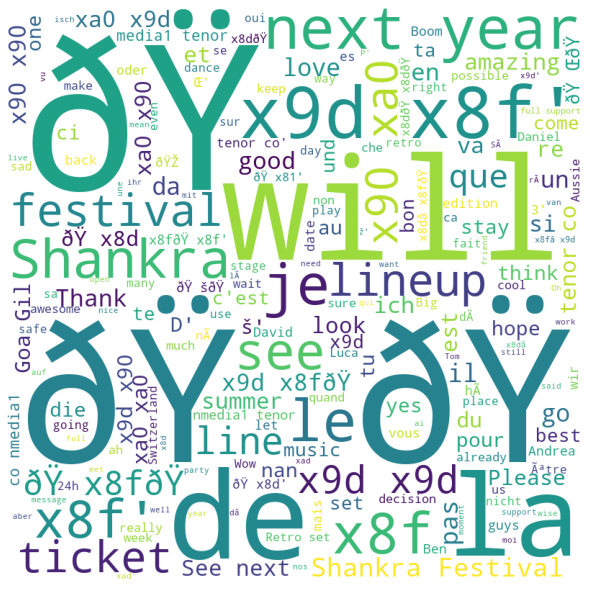

In [ ]:
# In Comments, you have a column called comment - Create a wordcloud AFTER cleaning the data properly.

#loading required libraries

from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt

#creating wordcloud

text = data2['Comment'].values 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(str(text))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()



# "Using the Reactions Data, Reshape the Data from Long to Wide 
#- New data will have Columns called Date, Reaction_What , Count of Reactions and Minimum Date to Maximum Dates (*Join Post_List and Reactions to get Date)"


In [ ]:
# "Using the Reactions Data, Reshape the Data from Long to Wide 
#- New data will have Columns called Date, Reaction_What , Count of Reactions and Minimum Date to Maximum Dates (*Join Post_List and Reactions to get Date)"

#creating new dataframe for reshaping

re1=data3
re1['idx']=re1.groupby('Reactions_What').cumcount()
re1



,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL,idx
0,Aremacs Sud-Est,https://m.facebook.com/AremacsSudEst/,Like,Page,https://m.facebook.com/story.php?story_fbid=30...,0
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagaz...,Love,Page,https://m.facebook.com/story.php?story_fbid=30...,0
2,Vale DeKÃ¬,https://m.facebook.com/vale.deki.5,Like,Person,https://m.facebook.com/story.php?story_fbid=30...,1
3,AndrÃ© Novais,https://m.facebook.com/andre.novais.7777,Like,Person,https://m.facebook.com/story.php?story_fbid=30...,2
4,Luca Luca,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=30...,3
...,...,...,...,...,...,...
2670,Julijana Djokic,https://m.facebook.com/julijana.djokic.50,Like,Person,https://m.facebook.com/story.php?story_fbid=24...,2181
2671,Agostinho Tito,https://m.facebook.com/agostinho.tito.75,Like,Person,https://m.facebook.com/story.php?story_fbid=24...,2182
2672,Corine Maurel,https://m.facebook.com/corine.maurel.988,Like,Person,https://m.facebook.com/story.php?story_fbid=24...,2183
2673,Ð¢Ð°Ñ‚ÑŒÑÐ½Ð° ÐŸÐ°Ð»Ð¸Ð¹,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=24...,2184


#counting rection and making them a separate entity an dmaking reshape

In [ ]:
#counting rection and making them a separate entity an dmaking reshape

re1['Count_reaction']=re1.Reactions_What.value_counts()
for url in re1['Post_URL']:
    re1['Date']=data1['post_date']
re1.pivot(index=None, columns='Reactions_What', values= None)

Reactions_By        ... Date                                   
Reactions_What         Care Laugh  ...  WOW _59aq img sp_laR69l2s_L1 sx_6c03b5
0                       NaN   NaN  ...  NaT                                NaT
1                       NaN   NaN  ...  NaT                                NaT
2                       NaN   NaN  ...  NaT                                NaT
3                       NaN   NaN  ...  NaT                                NaT
4                       NaN   NaN  ...  NaT                                NaT
...                     ...   ...  ...  ...                                ...
2670                    NaN   NaN  ...  NaT                                NaT
2671                    NaN   NaN  ...  NaT                                NaT
2672                    NaN   NaN  ...  NaT                                NaT
2673                    NaN   NaN  ...  NaT                                NaT
2674                    NaN   NaN  ...  NaT                                NaT

[2675 rows x 42 columns]